In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix



In [32]:
#Cargamos el Dataset
df = pd.read_csv('C:/Users/Fer/Documents/Fernando/archivospython/german-credit.csv', sep=',')
#Visualizamos el Dataset
df

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [29]:
df.shape

(1000, 38)

In [33]:
#Transformo variables de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['credit_history'], prefix='credit_history')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('credit_history',axis='columns')

dummies = pd.get_dummies(df['personal_status'], prefix='personal_status')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('personal_status',axis='columns')

dummies = pd.get_dummies(df['property_magnitude'], prefix='property_magnitude')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('property_magnitude',axis='columns')

dummies = pd.get_dummies(df['other_payment_plans'], prefix='other_payment_plans')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('other_payment_plans',axis='columns')

dummies = pd.get_dummies(df['housing'], prefix='housing')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('housing',axis='columns')

dummies = pd.get_dummies(df['job'], prefix='job')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('job',axis='columns')




In [34]:
dummies = pd.get_dummies(df['other_parties'], prefix='other_parties')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('other_parties',axis='columns')

In [35]:
#Cambiamos yes o NO por 1 o 0
df['own_telephone'] = df['own_telephone'].factorize(['yes','none'])[0]

#Cambiamos yes o NO por 1 o 0
df['foreign_worker'] = df['foreign_worker'].factorize(['yes','no'])[0]


#Cambiamos good o bad por 1 o 0
df['class'] = df['class'].factorize(['good','bad'])[0]


In [36]:
df

,over_draft,credit_usage,purpose,current_balance,Average_Credit_Balance,employment,location,residence_since,cc_age,existing_credits,...,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,other_parties_co applicant,other_parties_guarantor,other_parties_none
0,<0,6,radio/tv,1169,no known savings,>=7,4,4,67,2,...,False,True,False,False,True,False,False,False,False,True
1,0<=X<200,48,radio/tv,5951,<100,1<=X<4,2,2,22,1,...,False,True,False,False,True,False,False,False,False,True
2,no checking,12,education,2096,<100,4<=X<7,2,3,49,1,...,False,True,False,False,False,False,True,False,False,True
3,<0,42,furniture/equipment,7882,<100,4<=X<7,2,4,45,1,...,True,False,False,False,True,False,False,False,True,False
4,<0,24,new car,4870,<100,1<=X<4,3,4,53,2,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,furniture/equipment,1736,<100,4<=X<7,3,4,31,1,...,False,True,False,False,False,False,True,False,False,True
996,<0,30,used car,3857,<100,1<=X<4,4,4,40,1,...,False,True,False,True,False,False,False,False,False,True
997,no checking,12,radio/tv,804,<100,>=7,4,4,38,1,...,False,True,False,False,True,False,False,False,False,True
998,<0,45,radio/tv,1845,<100,1<=X<4,4,4,23,1,...,True,False,False,False,True,False,False,False,False,True


In [37]:
print("Número de observaciones por clase:")
print(df['class'].value_counts())
print("")

print("Porcentaje de observaciones por clase:")
print(100 * df['class'].value_counts(normalize=True))

Número de observaciones por clase:
class
1    700
0    300
Name: count, dtype: int64

Porcentaje de observaciones por clase:
class
1    70.0
0    30.0
Name: proportion, dtype: float64


In [39]:
df=df.drop('employment', axis=1)
df=df.drop('Average_Credit_Balance', axis=1)



In [46]:
df=df.drop('over_draft', axis=1)
df=df.drop('purpose', axis=1)


In [47]:
df

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents,own_telephone,foreign_worker,class,...,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,other_parties_co applicant,other_parties_guarantor,other_parties_none
0,6,1169,4,4,67,2,1,1,1,1,...,False,True,False,False,True,False,False,False,False,True
1,48,5951,2,2,22,1,1,0,1,0,...,False,True,False,False,True,False,False,False,False,True
2,12,2096,2,3,49,1,2,0,1,1,...,False,True,False,False,False,False,True,False,False,True
3,42,7882,2,4,45,1,2,0,1,1,...,True,False,False,False,True,False,False,False,True,False
4,24,4870,3,4,53,2,2,0,1,0,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,False,True,False,False,False,False,True,False,False,True
996,30,3857,4,4,40,1,1,1,1,1,...,False,True,False,True,False,False,False,False,False,True
997,12,804,4,4,38,1,1,0,1,1,...,False,True,False,False,True,False,False,False,False,True
998,45,1845,4,4,23,1,1,1,1,0,...,True,False,False,False,True,False,False,False,False,True


In [48]:
#Separamos variable target del resto del dataset
x = df.drop('class', axis=1)
y = df['class']
print(x.head(2))
print(y.head(2))

   credit_usage  current_balance  location  residence_since  cc_age   
0             6             1169         4                4      67  \
1            48             5951         2                2      22   

   existing_credits  num_dependents  own_telephone  foreign_worker   
0                 2               1              1               1  \
1                 1               1              0               1   

   credit_history_all paid  ...  housing_for free  housing_own  housing_rent   
0                    False  ...             False         True         False  \
1                    False  ...             False         True         False   

   job_high qualif/self emp/mgmt  job_skilled  job_unemp/unskilled non res   
0                          False         True                        False  \
1                          False         True                        False   

   job_unskilled resident  other_parties_co applicant   
0                   False                 

In [49]:
#Divido Dataset de training y Test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(700, 35)
(300,)


In [50]:
#Parametros de ejecucion
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [51]:
#Entrenamos modelo
mlp.fit(x_train,y_train)


MLPClassifier(max_iter=500)

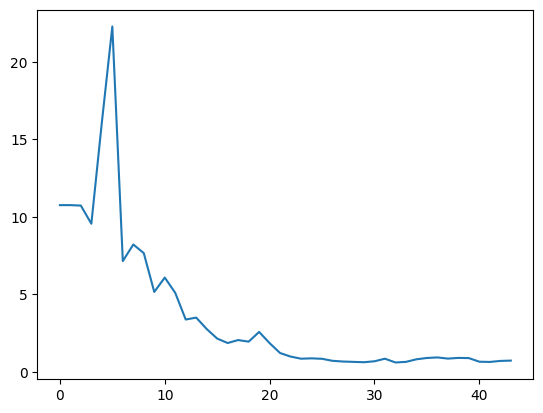

In [52]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.show()

In [54]:
#PRedecimos con dataset de test
pred = mlp.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [55]:
#Metricas de Evaluacion
confusion_matrix(y_test,pred)

array([[  1,  90],
       [  0, 209]], dtype=int64)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        91
           1       0.70      1.00      0.82       209

    accuracy                           0.70       300
   macro avg       0.85      0.51      0.42       300
weighted avg       0.79      0.70      0.58       300



In [57]:
#Parametros de ejecucion cambiamos para validar presicion del modelo
mlp1 = MLPClassifier(max_iter=900, activation='identity', )
mlp1.get_params()

{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 900,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [58]:
#Entrenamos modelo
mlp1.fit(x_train,y_train)


MLPClassifier(activation='identity', max_iter=900)

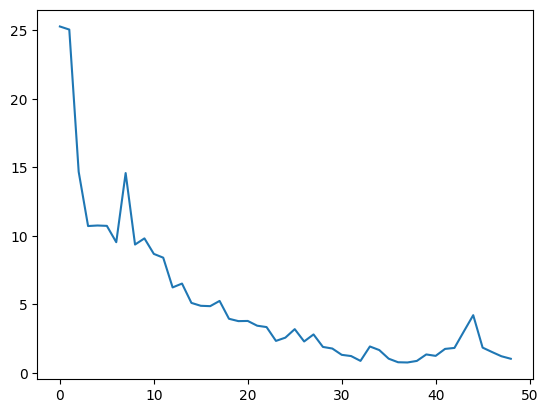

In [59]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp1.loss_curve_)
plt.show()

In [60]:
#PRedecimos con dataset de test
pred1 = mlp1.predict(x_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], d

In [62]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37        91
           1       0.74      0.89      0.81       209

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.59       300
weighted avg       0.67      0.70      0.67       300



In [63]:
#Metricas de Evaluacion
confusion_matrix(y_test,pred1)

array([[ 26,  65],
       [ 24, 185]], dtype=int64)